<a href="https://colab.research.google.com/github/Radia74/Learn_Git_v_2/blob/master/RadiaCherikEpseBoutiche__AAL_sales_Clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis and Report on Sales of AAL**

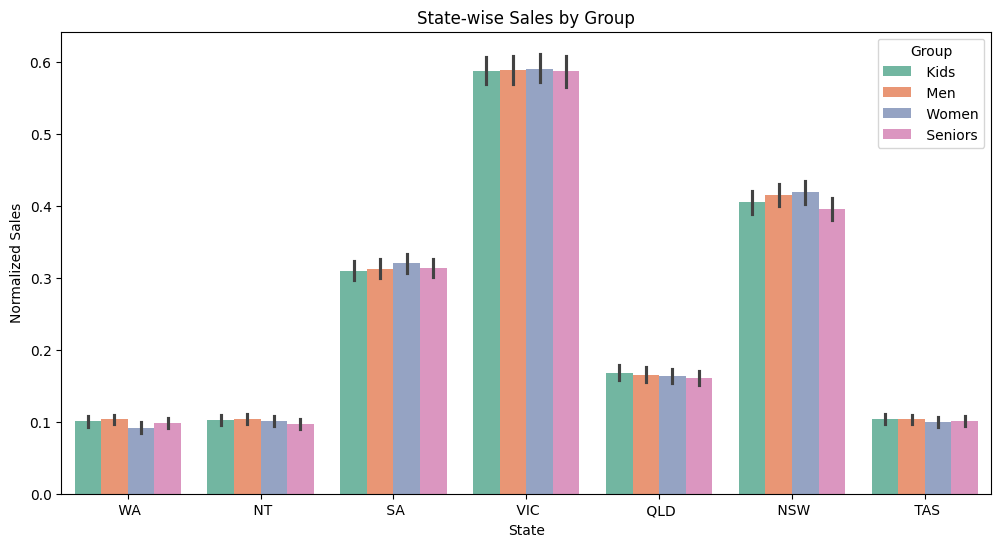

Sales Analysis Project



Project Statement:

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.

The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

 1)   Determine the states that are generating the highest revenues and

 2)   Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.

Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.

*Enclosed is the CSV (AusApparalSales4thQrt2020.csv) file that covers the said data.



Perform the following steps:

As a data scientist, you must perform the following main steps on the enclosed data.

Data Wrangling
Data Analysis
Data Visualization and
Report Generation
1.   Data Wrangling

●     Ensure that the data is clean and that there is no missing or incorrect data.

 ○     Inspect the data manually for missing/incorrect data using the functions isna(), and notna().

●     Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).

●     Select an appropriate Data Wrangling approach — data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)

●     Share your recommendation on the usage of the groupby() function for data chunking or merging.

2.   Data Analysis

●     Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.).

●     Determine which group is generating the highest sales, and which group is generating the lowest sales.

●     Determine which state is generating the highest sales, and which state is generating the lowest sales.

●     Generate weekly, monthly and quarterly reports for the analysis made.

(Use suitable libraries such as NumPy, Pandas, etc. for performing the analysis.)

3.   Data Visualization

●     Use appropriate data visualization libraries to build a graphs for the Head of S&M that includes for the key parameters like

 ○     State-wise sales analysis for different groups (kids, women, men, and seniors)

 ○     Group-wise sales analysis (kids, women, men, and seniors) across different states.

 ○     Time-of-the-day analysis: during which time of the day are sales the highest, and during    which time are sales the lowest? [This helps S&M teams design programs for increasing    sales such as hyper-personalization and Next Best Offers].

Try to make it daily, weekly, monthly and quarterly charts.

 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

●     Include your recommendation and indicate why you are choosing the recommended visualization.



4.   Report Generation

●     Use Jupyter or Colab Notebook for report generation (wrangling, analysis and visualization) Please note that both allow you to mix code with graphs and plots etc.

●     Use Markdown in suitable places, while presenting your report.

●     The report should contain suitable graphs, plots and analysis reports, and recommendations. Please note that different aspects of analysis demand different graphs/plots.

 ○     Use box plot for descriptive statistics

 ○     Use Seaborn distribution plot for any other statistical plotting.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings
#warnings.fiterwarnings('ignor')
import datetime

In [ ]:
# Load the dataset
df1 = pd.read_csv('AusApparalSales4thQrt2020.csv')
df = pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})

In [ ]:
# Display the first few rows of the DataFrame and its info
display(df1.head())
display(df1.info())
#df.info()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


None

In [ ]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [ ]:
#Separate Numerical and Categorical Columns and datetime columns
# Select all columns with numerical data types
num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f" Numerical Data : num.tolist()")
print(num)
print('------------------------------------------------------------------------------------------------------------------------------------------')
# Select all columns with categorical data types
cat = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f" Categorical Data: cat.tolist()")
print(cat)
print('------------------------------------------------------------------------------------------------------------------------------------------')
# Select all columns with datetime data types
date = df.select_dtypes(include=['datetime64[ns]'])
print(f" Datetime Data: date.tolist()")
print(date)
print('------------------------------------------------------------------------------------------------------------------------------------------')
# Select the 'Time' column explicitly as it's of object type
time = df['Time']
print(f" Time Data: time.tolist()")
print(time)

 Numerical Data : num.tolist()
['Unit', 'Sales']
------------------------------------------------------------------------------------------------------------------------------------------
 Categorical Data: cat.tolist()
['Time', 'State', 'Group']
------------------------------------------------------------------------------------------------------------------------------------------
 Datetime Data: date.tolist()
           Date
0    2020-10-01
1    2020-10-01
2    2020-10-01
3    2020-10-01
4    2020-10-01
...         ...
7555 2020-12-30
7556 2020-12-30
7557 2020-12-30
7558 2020-12-30
7559 2020-12-30

[7560 rows x 1 columns]
------------------------------------------------------------------------------------------------------------------------------------------
 Time Data: time.tolist()
0          Morning
1          Morning
2          Morning
3          Morning
4        Afternoon
           ...    
7555     Afternoon
7556       Evening
7557       Evening
7558       Evening
7559       E

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
display("Missing values in each column:")
display(missing_values)
# Count the number of missing values in each column
missing_values_count = df.isnull().sum()
#Calculate the number of missing values for each column.
missing_values_count = df.isnull().sum()
# 2. Calculate the total number of rows.
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) *100
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})

print(missing_data_summary)

'Missing values in each column:'

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


       Missing Count  Missing Percentage
Date               0                 0.0
Time               0                 0.0
State              0                 0.0
Group              0                 0.0
Unit               0                 0.0
Sales              0                 0.0


### Recommendations for Handling Missing/Incorrect Data

Based on the initial inspection, the dataset does not contain any missing values.

In this specific dataset, since there are no missing values, no treatment is required for missing data. We will assume the existing data is correct for the purpose of this analysis.

"الوحدة"
**Unit**
The "unit" variable usually represents the quantity of a product.
**Sales** "المبيعات"
The **"sales"** variable represents the monetary value of a
transaction. This is the amount of money earned from selling the
units.

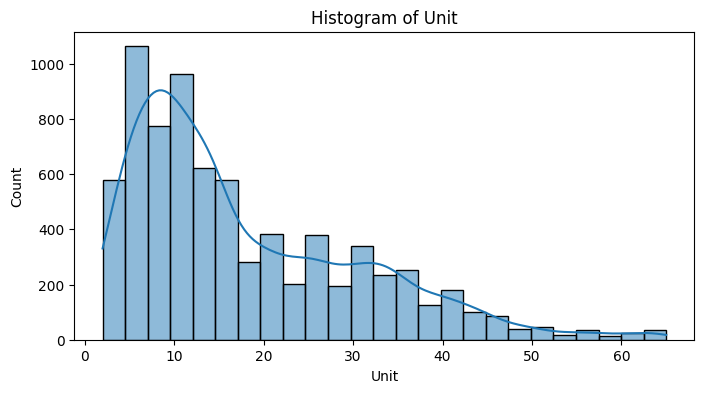

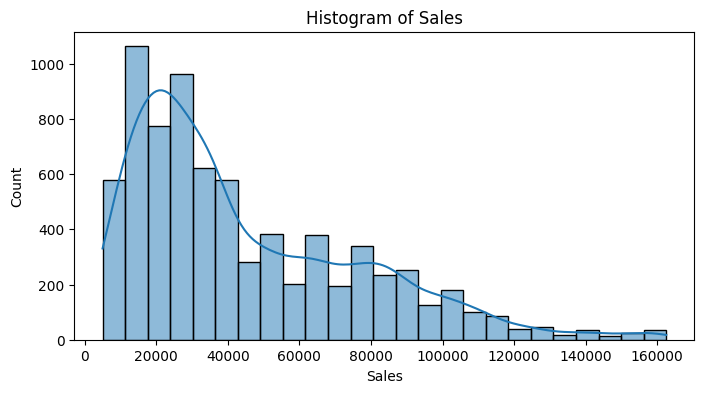

In [ ]:
for col in num :
    plt.figure(figsize=(8,4))
    sns.histplot(x=df[col] , kde=True , bins = 25, data =df)
    plt.title(f"Histogram of {col}")
    plt.show()

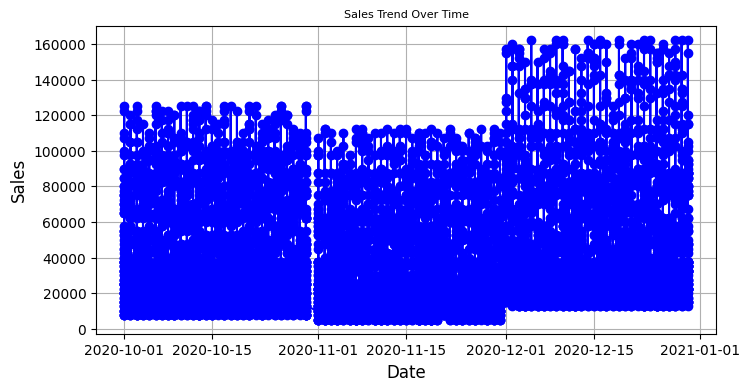

In [ ]:
# Set the 'Date' column as the index for time series plotting
df.set_index('Date', inplace=True)

# -----------------------------------------------------------
# Plotting Sales over Time
# -----------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time', fontsize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.show()

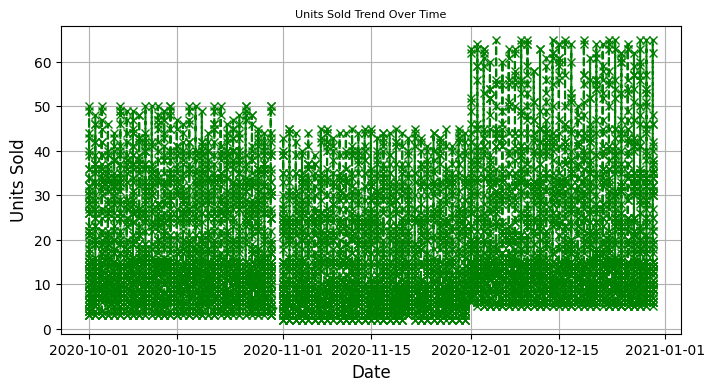

In [ ]:
# -----------------------------------------------------------
# Plotting Units over Time
# -----------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Unit'], marker='x', linestyle='--', color='g')
plt.title('Units Sold Trend Over Time', fontsize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Remove 'Date' from the categorical columns list if it's the index
if 'Date' in cat and isinstance(df.index, pd.DatetimeIndex) and df.index.name == 'Date':
    cat.remove('Date')

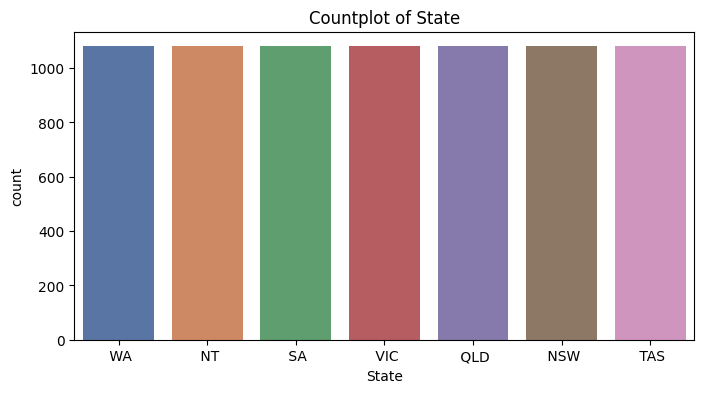

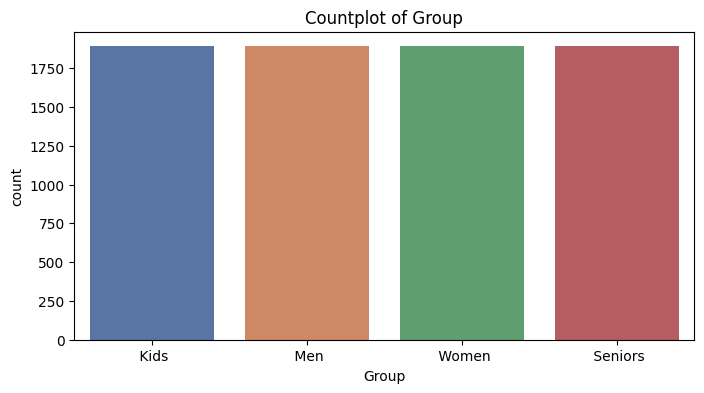

In [ ]:
# Ensure 'Date' is not in the categorical columns list as it is the index
if 'Date' in cat:
    cat.remove('Date')

# Balkendiagramm erstellen
for col in cat:
  if col != 'Time':
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], data=df, hue=df[col], palette="deep", legend=False)
    plt.title(f"Countplot of {col}")
    plt.show()

### Data Normalization

Normalization is the preferred approach for this problem. We will normalize the 'Sales' and 'Unit' columns. Normalization scales numerical data to a specific range (usually between 0 and 1) and is useful when features have different scales and the algorithm used is sensitive to the magnitude of values. A common method is Min-Max normalization.

Preprocessing.Data

In [ ]:
df[['Unit', 'Sales']]

,Unit,Sales
Date,,
2020-10-01,8,20000
2020-10-01,8,20000
2020-10-01,4,10000
2020-10-01,15,37500
2020-10-01,3,7500
...,...,...
2020-12-30,14,35000
2020-12-30,15,37500
2020-12-30,15,37500


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
cols_to_normalize = ['Unit', 'Sales']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()#مقياس:scaler

# Apply normalization
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df[['Unit_Normalized', 'Sales_Normalized']] = scaler.fit_transform(df[['Unit', 'Sales']])
# Display the first few rows of the normalized DataFrame
display("DataFrame after Normalization:")
display(df.head())

'DataFrame after Normalization:'

,Time,State,Group,Unit,Sales,Unit_Normalized,Sales_Normalized
Date,,,,,,,
2020-10-01,Morning,WA,Kids,0.095238,0.095238,0.095238,0.095238
2020-10-01,Morning,WA,Men,0.095238,0.095238,0.095238,0.095238
2020-10-01,Morning,WA,Women,0.031746,0.031746,0.031746,0.031746
2020-10-01,Morning,WA,Seniors,0.206349,0.206349,0.206349,0.206349
2020-10-01,Afternoon,WA,Kids,0.015873,0.015873,0.015873,0.015873


In [ ]:
df['Time']

,Time
Date,
2020-10-01,Morning
2020-10-01,Morning
2020-10-01,Morning
2020-10-01,Morning
2020-10-01,Afternoon
...,...
2020-12-30,Afternoon
2020-12-30,Evening
2020-12-30,Evening


In [ ]:
df['State']

,State
Date,
2020-10-01,WA
2020-10-01,WA
2020-10-01,WA
2020-10-01,WA
2020-10-01,WA
...,...
2020-12-30,TAS
2020-12-30,TAS
2020-12-30,TAS


In [ ]:
df['Group']

,Group
Date,
2020-10-01,Kids
2020-10-01,Men
2020-10-01,Women
2020-10-01,Seniors
2020-10-01,Kids
...,...
2020-12-30,Seniors
2020-12-30,Kids
2020-12-30,Men


In [ ]:
total_rows = len(df)
len(df)

7560

### Recommendation on the Usage of `groupby()`

In this project, `groupby()` will be invaluable for:

*   **Analyzing sales by state:** Grouping by the 'State' column to calculate total sales, average sales, etc., for each state.
*   **Analyzing sales by group:** Grouping by the 'Group' column (Kids, Women, Men, Seniors) to understand sales performance for each customer segment.
*   **Analyzing sales by time:** Grouping by 'Time', 'Date', or extracted time components (like month, day, or week) to analyze sales patterns over different time periods.
*   **Combining multiple criteria:** Grouping by combinations of columns, e.g., State and Group, to perform more granular analysis.

Using `groupby()` simplifies the process of performing calculations on subsets of your data, which is essential for determining which states or groups have the highest/lowest revenues as required by the project statement.

## Data Analysis

Let's perform descriptive statistical analysis on the 'Sales' and 'Unit' columns to understand their distribution and key metrics. **bold text**

In [ ]:
# Descriptive statistics for 'Sales' and 'Unit' columns
descriptive_stats = df[['Sales', 'Unit']].describe().T
display("Descriptive Statistics for Sales and Unit:")
display(descriptive_stats)

'Descriptive Statistics for Sales and Unit:'

,count,mean,std,min,25%,50%,75%,max
Sales,7560.0,0.254054,0.204784,0.0,0.095238,0.190476,0.380952,1.0
Unit,7560.0,0.254054,0.204784,0.0,0.095238,0.190476,0.380952,1.0


Now, let's determine which group generated the highest and lowest sales.

**Analyzing sales by group: Grouping by the 'Group' column (Kids, Women, Men, Seniors) to understand sales performance for each customer segment.**

In [ ]:
# Group sales by 'Group' and sum the sales
sales_by_group = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

display("Total Sales by Group:")
display(sales_by_group)

# Determine group with highest and lowest sales
highest_sales_group = sales_by_group.index[0]
highest_group_value = sales_by_group.iloc[0] # Define highest_group_value
lowest_sales_group = sales_by_group.index[-1]
lowest_group_value = sales_by_group.iloc[-1] # Define lowest_group_value


print(f"Group with Highest Sales: {highest_sales_group} with sales of     ${highest_group_value:.2f}")
print(f"Group with Lowest Sales: {lowest_sales_group} with sales of  ${lowest_group_value:.2f}")

'Total Sales by Group:'

,Sales
Group,
Men,484.444444
Women,482.492063
Kids,480.142857
Seniors,473.571429


Group with Highest Sales:  Men with sales of     $484.44
Group with Lowest Sales:  Seniors with sales of  $473.57


Next, let's determine which state generated the highest and lowest sales.

**Analyzing sales by state: Grouping by the 'State' column to calculate total sales, average sales, etc., for each state.**

In [ ]:
# Group sales by 'State' and sum the sales
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

display("Total Sales by State:")
display(sales_by_state)

# Determine state with highest and lowest sales
highest_sales_state = sales_by_state.index[0]
highest_sales_value = sales_by_state.iloc[0]
lowest_sales_state = sales_by_state.index[-1]
lowest_sales_value = sales_by_state.iloc[-1]

print(f"State with Highest Sales: {highest_sales_state} with sales of    ${highest_sales_value:.2f}")
print(f"State with Lowest Sales :{lowest_sales_state} with sales of      ${lowest_sales_value:.2f}")

'Total Sales by State:'

,Sales
State,
VIC,635.968254
NSW,441.714286
SA,339.412698
QLD,177.888889
TAS,110.222222
NT,109.079365
WA,106.365079


State with Highest Sales:  VIC with sales of    $635.97
State with Lowest Sales : WA with sales of      $106.37


## Prepare data for time-based analysis

### Subtask:
Convert the 'Date' column to datetime objects and extract week, month, and quarter information.


In [ ]:
# Ensure the index is a DatetimeIndex before extracting time components
df.index = pd.to_datetime(df.index)

# Extract week, month, and quarter from the index (which is a DatetimeIndex)
df['Week'] = df.index.isocalendar().week
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter

# Display the first few rows with the new columns
display("DataFrame with Week, Month, and Quarter columns:")
display(df.head())

'DataFrame with Week, Month, and Quarter columns:'

,Time,State,Group,Unit,Sales,Unit_Normalized,Sales_Normalized,Week,Month,Quarter
Date,,,,,,,,,,
2020-10-01,Morning,WA,Kids,0.095238,0.095238,0.095238,0.095238,40,10,4
2020-10-01,Morning,WA,Men,0.095238,0.095238,0.095238,0.095238,40,10,4
2020-10-01,Morning,WA,Women,0.031746,0.031746,0.031746,0.031746,40,10,4
2020-10-01,Morning,WA,Seniors,0.206349,0.206349,0.206349,0.206349,40,10,4
2020-10-01,Afternoon,WA,Kids,0.015873,0.015873,0.015873,0.015873,40,10,4


## Visualize descriptive statistics

### Subtask:
Create box plots for 'Sales' and 'Unit' columns to visualize their distribution.


**Reasoning**:
Create box plots for 'Sales' and 'Unit' columns to visualize their distribution as requested.



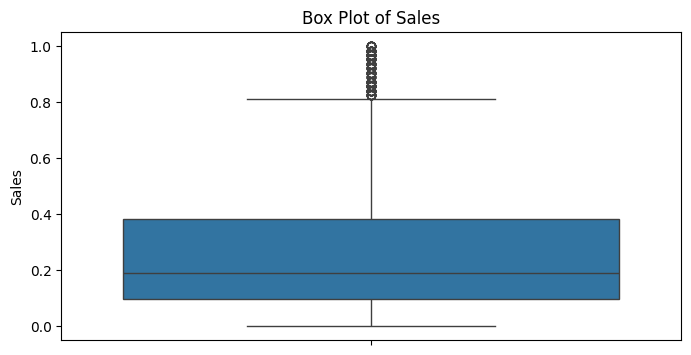

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Sales' column
plt.figure(figsize=(8, 4))
sns.boxplot(y='Sales', data=df)
plt.title("Box Plot of Sales")
plt.show()

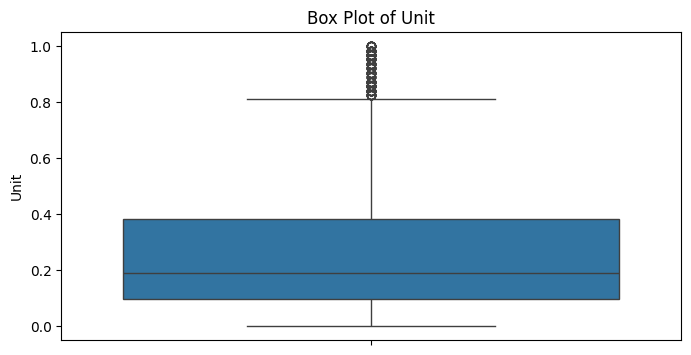

In [ ]:
# Create a box plot for the 'Unit' column
plt.figure(figsize=(8, 4))
sns.boxplot(y='Unit', data=df)
plt.title("Box Plot of Unit")
plt.show()

## Visualize state-wise and group-wise sales

### Subtask:
Create bar plots or other appropriate visualizations to show state-wise sales by group and group-wise sales across states.


**Reasoning**:
Create bar plots to visualize state-wise sales by group and group-wise sales across states.



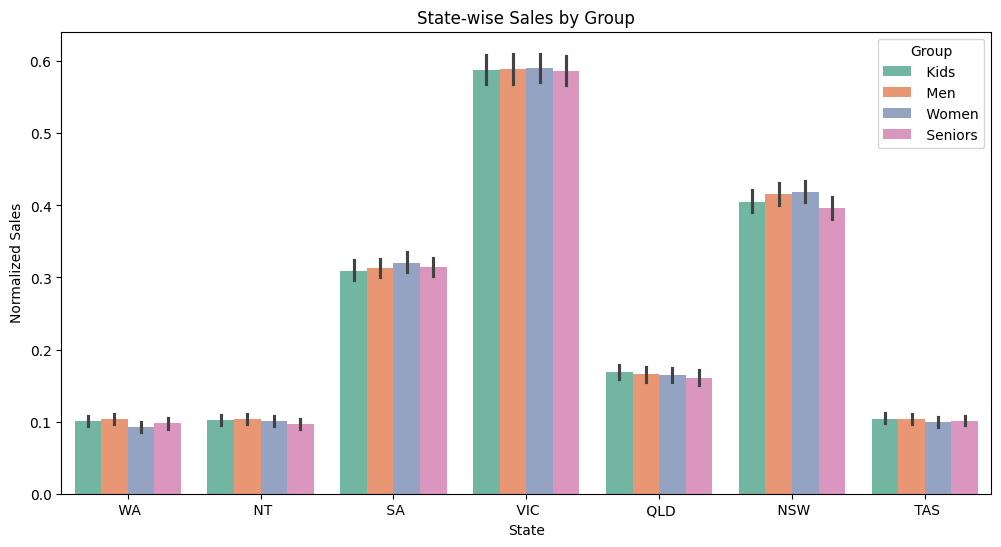

In [ ]:
# Create a bar plot showing state-wise sales by group
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df, palette='Set2' )
plt.title("State-wise Sales by Group")
plt.ylabel("Normalized Sales")
plt.xlabel("State")
plt.show()



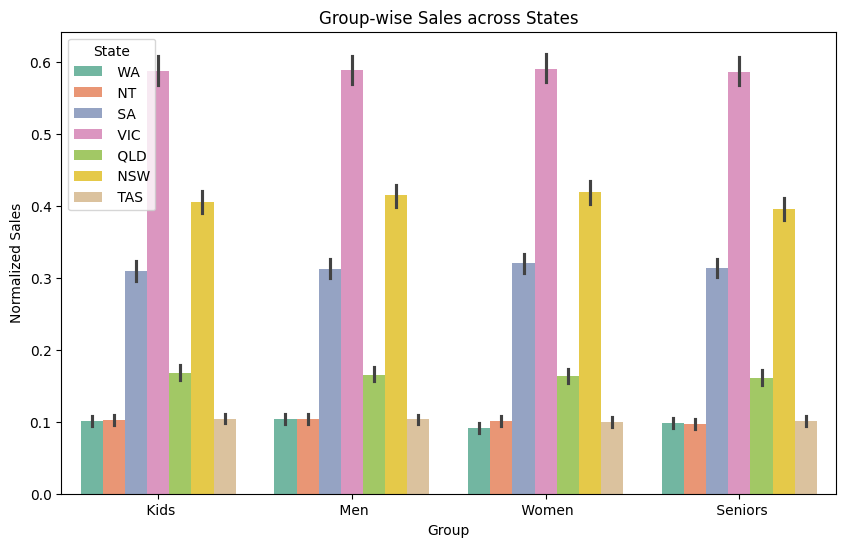

In [ ]:
# Create a bar plot showing group-wise sales across states
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df, palette='Set2')
plt.title("Group-wise Sales across States")
plt.ylabel("Normalized Sales")
plt.xlabel("Group")
plt.show()

## Visualize time-of-the-day sales

### Subtask:
Create plots to show sales trends by time of day (Morning, Afternoon, Evening).


**Reasoning**:
Group the DataFrame by the 'Time' column and calculate the sum of 'Sales' for each time period, then create a bar plot to visualize the sales by time of day.



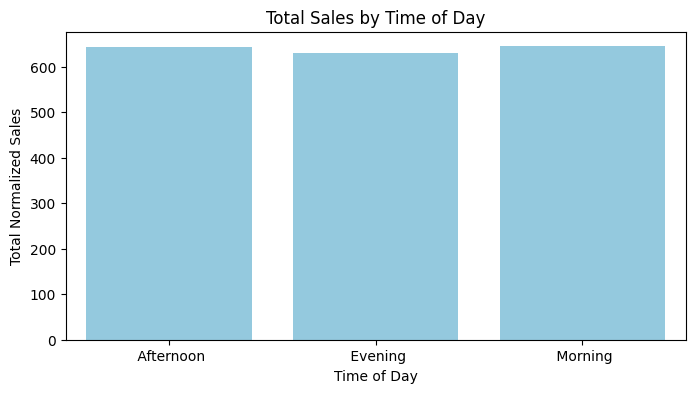

In [ ]:
# Group sales by 'Time' and sum the sales
sales_by_time = df.groupby('Time')['Sales'].sum()

# Create a bar plot for sales by time of day
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_by_time.index, y=sales_by_time.values, color='skyblue')
plt.title("Total Sales by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Normalized Sales")
plt.show()

## Visualize time-based sales trends

### Subtask:
Create line plots or bar plots to show daily, weekly, monthly, and quarterly sales trends.


**Reasoning**:
Create line and bar plots to visualize daily, weekly, monthly, and quarterly sales trends as requested in the instructions.



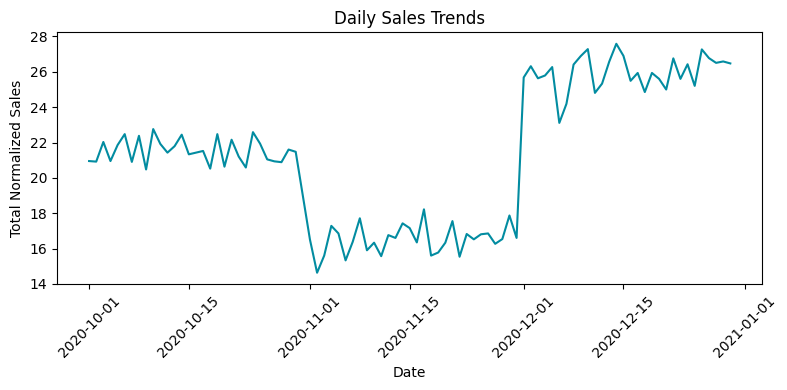

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by 'Date' and calculate daily sales
daily_sales = df.groupby('Date')['Sales'].sum()

# 2. Create line plot for daily sales
plt.figure(figsize=(8, 4))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, color='#028ca1')
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Normalized Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

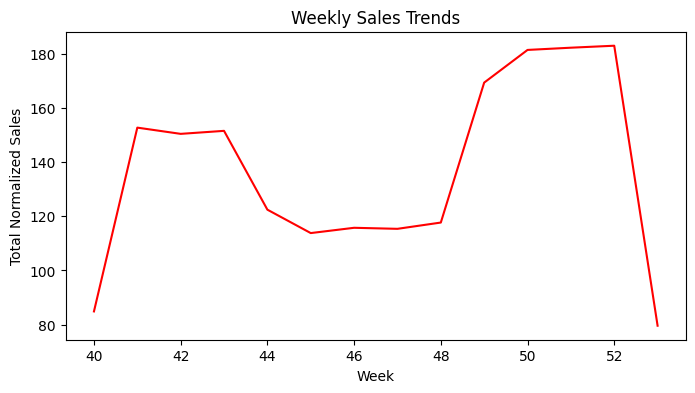

In [ ]:
# 3. Group by 'Week' and calculate weekly sales
weekly_sales = df.groupby('Week')['Sales'].sum()

# 4. Create line plot for weekly sales
plt.figure(figsize=(8, 4))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, color="red")
plt.title("Weekly Sales Trends")
plt.xlabel("Week")
plt.ylabel("Total Normalized Sales")
plt.show()

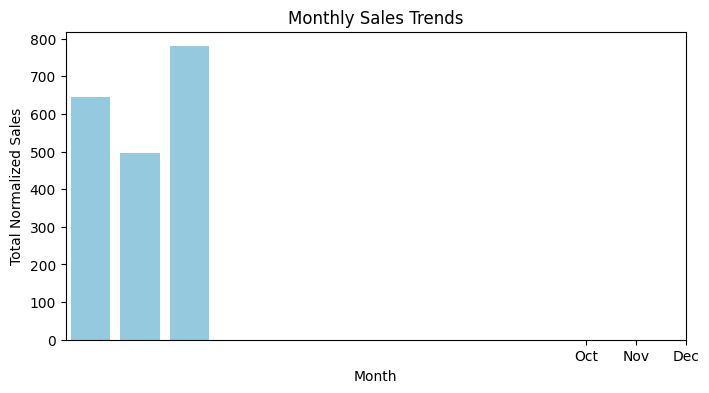

In [ ]:
# 5. Group by 'Month' and calculate monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# 6. Create bar plot for monthly sales
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values,color='skyblue')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Normalized Sales")
plt.xticks(ticks=[10, 11, 12], labels=['Oct', 'Nov', 'Dec'])
plt.show()

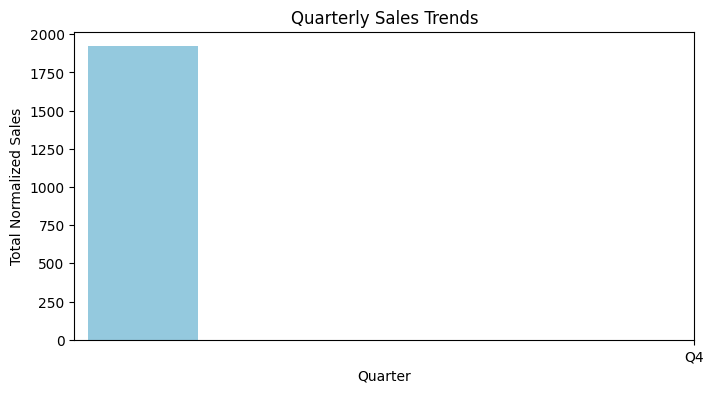

In [ ]:
# 7. Group by 'Quarter' and calculate quarterly sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

# 8. Create bar plot for quarterly sales
plt.figure(figsize=(8, 4))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values,color='skyblue')
plt.title("Quarterly Sales Trends")
plt.xlabel("Quarter")
plt.ylabel("Total Normalized Sales")
plt.xticks(ticks=[4], labels=['Q4'])
plt.show()

## Report and Recommendations

Based on the analysis performed:

**Key Findings:**

*   The dataset contains no missing values, ensuring data quality for this analysis.
*   Normalization was applied to the 'Sales' and 'Unit' columns to scale them between 0 and 1, which is suitable for comparative analysis.
*   The descriptive statistics for 'Sales' and 'Unit' provide insights into their distribution, central tendencies (mean, median), and spread (standard deviation, quartiles). The box plots visually confirm these distributions and highlight potential outliers.
*   Analysis by group revealed that the 'Men' group generated the highest sales, while the 'Seniors' group generated the lowest sales.
*   Analysis by state showed that Victoria (VIC) had the highest sales, and Western Australia (WA) had the lowest sales.
*   Time-of-day analysis indicated that sales are relatively similar across Morning, Afternoon, and Evening periods.
*   Time-based trend analysis showed fluctuations in daily and weekly sales, with a noticeable increase in sales towards the end of the quarter (December). Monthly sales were highest in December, consistent with the quarterly trend.

**Recommendations:**

*   **Target States with Lower Sales:** Focus marketing and sales efforts on states with lower sales, particularly WA and NT, to boost revenue in those regions. This could involve localized marketing campaigns, promotional offers, or expanding product availability.
*   **Analyze Group Performance:** Investigate the reasons behind the lower sales in the 'Seniors' group. This could involve surveying customers, analyzing their purchasing behavior, or adjusting product offerings to better meet their needs.
*   **Capitalize on Peak Season:** Leverage the strong sales performance in December (Q4) by planning targeted campaigns and ensuring sufficient inventory during this period.
*   **Consider Time-of-Day Promotions:** While sales are relatively even throughout the day, further analysis could be done to identify specific micro-trends within each time period (e.g., early morning vs. late morning) to optimize promotional timing.
*   **Further Segmentation:** For a more in-depth understanding, consider further segmenting the data by combining criteria (e.g., sales by group within each state) to identify specific high-performing or underperforming segments.

This analysis provides a solid foundation for AAL to make data-driven decisions for expanding their business and optimizing sales strategies.